# This Notebook for cityspire DS API
- Datasets
  - crime rates
  - rental rates
  - population
  - walkability
- JSON Response
- JSON dict 

# Initial Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# crime_rate dataset
url_cr = 'https://raw.githubusercontent.com/JeffreyAsuncion/LambdaLabs/main/cityspire-a-ds/Datasets_csv/2021_pred_crime.csv'
# rental_rate dataset
url_rr = 'https://raw.githubusercontent.com/JeffreyAsuncion/LambdaLabs/main/cityspire-a-ds/Datasets_csv/Rent_Predictions_Jan21.csv'
# population dataset
url_pop = 'https://raw.githubusercontent.com/JeffreyAsuncion/LambdaLabs/main/cityspire-a-ds/Datasets_csv/pop_2021.csv'
# walk_score dataset
url_walk = 'https://raw.githubusercontent.com/JeffreyAsuncion/LambdaLabs/main/cityspire-a-ds/Datasets_csv/walk.csv'

In [ ]:
cr_df = pd.read_csv(url_cr)
rr_df = pd.read_csv(url_rr)
pop_df = pd.read_csv(url_pop)
walk_df = pd.read_csv(url_walk)

Crime Rate

In [ ]:
cr_df.head()

,year,city_state,crime_rate,percent_diff_national
0,2021,"Abbeville, Alabama",26.3,-0.12
1,2021,"Adamsville, Alabama",71.2,1.40
2,2021,"Alabaster, Alabama",20.0,-0.33
3,2021,"Albertville, Alabama",38.5,0.30
4,2021,"Alexander City, Alabama",63.5,1.14


In [ ]:
# create columns to join datasets
cr_df["City_State"] = cr_df["city_state"]

In [ ]:
# filter down the columns to those needed for the JOIN
cr_df = cr_df[["City_State", "crime_rate"]]

In [ ]:
# number of unique City_State for Crime Rate Dataset
len(cr_df.City_State.unique())

9248

Rental Rates

In [ ]:
rr_df.head()

,Unnamed: 0,City_State,Year_Month,Price
0,0,"Albuquerque, New Mexico",2021-01,1319.3
1,1,"Allentown, Pennsylvania",2021-01,988.6
2,2,"Anaheim, California",2021-01,2673.7
3,3,"Atlanta, Georgia",2021-01,1643.2
4,4,"Augusta, Georgia",2021-01,1223.1


In [ ]:
# number of unique City_State for Rental Rate Dataset
len(rr_df.City_State.unique())

In [ ]:
rr_df.shape

(104, 4)

Walkability Score

In [ ]:
walk_df.head()

,Unnamed: 0,Walk Score,Transit Score,Bike Score,city_state
0,0,35,25,31,"Birmingham, Alabama"
1,1,26,16,38,"Montgomery, Alabama"
2,2,32,0,39,"Mobile, Alabama"
3,3,24,13,40,"Huntsville, Alabama"
4,4,33,0,37,"Tuscaloosa, Alabama"


In [ ]:
# number of unique City_State for Walk Score Dataset
len(walk_df.city_state.unique())

2500

In [ ]:
walk_df.shape

(2500, 5)

Population

In [ ]:
pop_df.head()

,YEAR,City_State,POPULATION
0,2021,"El Dorado Hills, California",46192.0
1,2021,"Eldridge, California",1208.0
2,2021,"El Granada, California",6695.0
3,2021,"Elizabeth Lake, California",1941.0
4,2021,"Elk Creek, California",239.0


In [ ]:
pop_df.shape

(29626, 3)

In [ ]:
pop_df["id_num"] = pop_df.index

In [ ]:
# number of unique City_State for Population Dataset
len(pop_df.city_state.unique())

# First Join for Crime Rate

NaN fill with average

In [ ]:
# Join the Population df with the Crime Rate df on the City_State column
join_df = pop_df.set_index('City_State').join(cr_df.set_index('City_State'))

In [ ]:
join_df.head()

,YEAR,POPULATION,id_num,crime_rate
City_State,,,,
"El Dorado Hills, California",2021,46192.0,0,NaN
"Eldridge, California",2021,1208.0,1,NaN
"El Granada, California",2021,6695.0,2,NaN
"Elizabeth Lake, California",2021,1941.0,3,NaN
"Elk Creek, California",2021,239.0,4,NaN


In [ ]:
# Check to see if any rows were lost during the JOIN
join_df.shape

(29626, 4)

In [ ]:
# make another id column
join_df["id"] = join_df["id_num"]

In [ ]:
join_df.reset_index(inplace=True)

In [ ]:
join_df.head()

,City_State,YEAR,POPULATION,id_num,crime_rate,id
0,"El Dorado Hills, California",2021,46192.0,0,NaN,0
1,"Eldridge, California",2021,1208.0,1,NaN,1
2,"El Granada, California",2021,6695.0,2,NaN,2
3,"Elizabeth Lake, California",2021,1941.0,3,NaN,3
4,"Elk Creek, California",2021,239.0,4,NaN,4


In [ ]:
# https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column
join_df = join_df.set_index('id')

In [ ]:
join_df.head()

,City_State,YEAR,POPULATION,id_num,crime_rate
id,,,,,
0,"El Dorado Hills, California",2021,46192.0,0,NaN
1,"Eldridge, California",2021,1208.0,1,NaN
2,"El Granada, California",2021,6695.0,2,NaN
3,"Elizabeth Lake, California",2021,1941.0,3,NaN
4,"Elk Creek, California",2021,239.0,4,NaN


In [ ]:
# Find any null values after the Population df and Crime Rate df are joined
join_df.isna().values.sum()

22252

In [ ]:
join_df.sample(10)

,City_State,YEAR,POPULATION,id_num,crime_rate
id,,,,,
8113,"Gapland, Maryland",2021,88.0,8113,NaN
5101,"Altoona, Florida",2021,61.0,5101,NaN
9762,"Parnell, Iowa",2021,239.0,9762,NaN
24493,"Springfield, South Carolina",2021,520.0,24493,NaN
20084,"Alger, Ohio",2021,962.0,20084,NaN
25744,"Del Mar Heights, Texas",2021,280.0,25744,NaN
1764,"Napaskiak, Alaska",2021,392.0,1764,NaN
29267,"Emajagua comunidad, Puerto Rico",2021,2604.0,29267,NaN
28265,"Bayfield, Wisconsin",2021,451.0,28265,55.2


In [ ]:
# Split the City_State column into the individual columns 
# to help fill the missing values according to State 
join_df[['CITY','STATE']] = join_df.City_State.str.split(",",expand=True)

In [ ]:
join_df.columns

Index(['City_State', 'YEAR', 'POPULATION', 'id_num', 'crime_rate', 'CITY',
       'STATE'],
      dtype='object')

In [ ]:
# number of states accounted for
len(join_df['STATE'].unique())

52

In [ ]:
join_df['STATE'].unique()[0]

' California'

In [ ]:
states = join_df['STATE'].unique()

In [ ]:
# 50 US States including D.C.(District of Columbia) and Puerto Rico
states

array([' California', ' Alabama', ' Alaska', ' Arizona', ' Arkansas',
       ' Illinois', ' Colorado', ' Connecticut', ' Delaware',
       ' District of Columbia', ' Florida', ' Georgia', ' Hawaii',
       ' Idaho', ' Kentucky', ' Louisiana', ' Maine', ' Maryland',
       ' Indiana', ' Iowa', ' Kansas', ' Minnesota', ' Mississippi',
       ' Missouri', ' Montana', ' Massachusetts', ' Michigan',
       ' New York', ' North Carolina', ' Nebraska', ' Nevada',
       ' New Hampshire', ' New Jersey', ' New Mexico', ' Pennsylvania',
       ' North Dakota', ' Ohio', ' Oklahoma', ' Oregon', ' Texas',
       ' Utah', ' Rhode Island', ' South Carolina', ' South Dakota',
       ' Tennessee', ' Puerto Rico', ' Vermont', ' Virginia',
       ' Washington', ' West Virginia', ' Wisconsin', ' Wyoming'],
      dtype=object)

## Crime rate fill with Average

In [ ]:
import numpy as np
import sys

# create a list for df of states crime rate
states_df = []

for i in range(len(states)):
    # filter df down to each state
    df = join_df[join_df['STATE'] == states[i]]
    # fill the NaN with the average for each state
    df['crime_rate'] = df['crime_rate'].replace(np.NaN, round(df.crime_rate.mean(), 2))
    # add df to list of states for concat below
    states_df.append(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


## have a look at the fill and some viualizes

In [ ]:
states_df[11]

,City_State,YEAR,POPULATION,id_num,crime_rate,CITY,STATE
id,,,,,,,
6012,"Abbeville, Georgia",2021,2821.0,6012,2.90,Abbeville,Georgia
6013,"Acworth, Georgia",2021,23494.0,6013,22.90,Acworth,Georgia
6014,"Adairsville, Georgia",2021,4949.0,6014,32.07,Adairsville,Georgia
6015,"Adel, Georgia",2021,5260.0,6015,32.07,Adel,Georgia
6016,"Adrian, Georgia",2021,732.0,6016,32.07,Adrian,Georgia
...,...,...,...,...,...,...,...
29471,"Sautee-Nacoochee, Georgia",2021,215.0,29471,32.07,Sautee-Nacoochee,Georgia
29525,"McRae-Helena, Georgia",2021,8276.0,29525,32.07,McRae-Helena,Georgia
29564,"Echols County consolidated government, Georgia",2021,3951.0,29564,32.07,Echols County consolidated government,Georgia


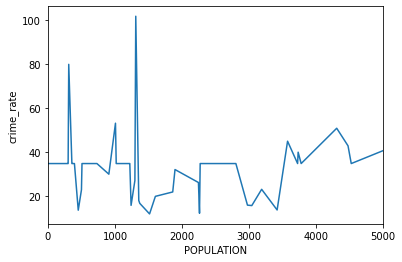

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=states_df[8], x='POPULATION', y="crime_rate")

# control x and y limits
# sns.plt.ylim(0, 20)
plt.xlim(0, 5000)
 
plt.show()


In [ ]:
len(states_df)

52

## Concat the States and fill Nan with dataset average if state ave not available

In [ ]:
states_df[1].head()

,City_State,YEAR,POPULATION,id_num,crime_rate,CITY,STATE
id,,,,,,,
975,"Abanda, Alabama",2021,235.0,975,37.72,Abanda,Alabama
976,"Abbeville, Alabama",2021,2527.0,976,26.30,Abbeville,Alabama
977,"Adamsville, Alabama",2021,4285.0,977,71.20,Adamsville,Alabama
978,"Addison, Alabama",2021,621.0,978,37.72,Addison,Alabama
979,"Akron, Alabama",2021,218.0,979,37.72,Akron,Alabama


In [ ]:
# just need to join the df together to rebuild full dataframe
cr_impute_df = states_df[0]

for i in range(1, len(states_df)):
    cr_impute_df = pd.concat([cr_impute_df, states_df[i]])

In [ ]:
cr_impute_df.shape

(29626, 7)

In [ ]:
cr_impute_df.head()

,City_State,YEAR,POPULATION,id_num,crime_rate,CITY,STATE
id,,,,,,,
0,"El Dorado Hills, California",2021,46192.0,0,46.36,El Dorado Hills,California
1,"Eldridge, California",2021,1208.0,1,46.36,Eldridge,California
2,"El Granada, California",2021,6695.0,2,46.36,El Granada,California
3,"Elizabeth Lake, California",2021,1941.0,3,46.36,Elizabeth Lake,California
4,"Elk Creek, California",2021,239.0,4,46.36,Elk Creek,California


In [ ]:
# check for nans
cr_impute_df.isna().values.sum()

1425

In [ ]:
# fill nans with ave crime rate for the whole df
cr_impute_df['crime_rate'] = cr_impute_df['crime_rate'].replace(np.NaN, round(cr_impute_df.crime_rate.mean(), 2))

In [ ]:
# check for nans
cr_impute_df.isna().values.sum()

0

In [ ]:
print(cr_impute_df.shape)
cr_impute_df.head()

(29626, 7)


,City_State,YEAR,POPULATION,id_num,crime_rate,CITY,STATE
id,,,,,,,
0,"El Dorado Hills, California",2021,46192.0,0,46.36,El Dorado Hills,California
1,"Eldridge, California",2021,1208.0,1,46.36,Eldridge,California
2,"El Granada, California",2021,6695.0,2,46.36,El Granada,California
3,"Elizabeth Lake, California",2021,1941.0,3,46.36,Elizabeth Lake,California
4,"Elk Creek, California",2021,239.0,4,46.36,Elk Creek,California


# Second Join for Rental Rates

In [ ]:
rr_df.head()

,Unnamed: 0,City_State,Year_Month,Price
0,0,"Albuquerque, New Mexico",2021-01,1319.3
1,1,"Allentown, Pennsylvania",2021-01,988.6
2,2,"Anaheim, California",2021-01,2673.7
3,3,"Atlanta, Georgia",2021-01,1643.2
4,4,"Augusta, Georgia",2021-01,1223.1


In [ ]:
rr_df["rental_rate"] = rr_df["Price"].copy()

In [ ]:
rr_df = rr_df[["City_State", "rental_rate"]]

In [ ]:
rr_df.head()

,City_State,rental_rate
0,"Albuquerque, New Mexico",1319.3
1,"Allentown, Pennsylvania",988.6
2,"Anaheim, California",2673.7
3,"Atlanta, Georgia",1643.2
4,"Augusta, Georgia",1223.1


In [ ]:

join_df2 = cr_impute_df.set_index('City_State').join(rr_df.set_index('City_State'))

In [ ]:
print(join_df2.shape)
join_df2.head()

(29626, 7)


,YEAR,POPULATION,id_num,crime_rate,CITY,STATE,rental_rate
City_State,,,,,,,
"El Dorado Hills, California",2021,46192.0,0,46.36,El Dorado Hills,California,NaN
"Eldridge, California",2021,1208.0,1,46.36,Eldridge,California,NaN
"El Granada, California",2021,6695.0,2,46.36,El Granada,California,NaN
"Elizabeth Lake, California",2021,1941.0,3,46.36,Elizabeth Lake,California,NaN
"Elk Creek, California",2021,239.0,4,46.36,Elk Creek,California,NaN


In [ ]:
# make another id column
join_df2["id"] = join_df2["id_num"]

In [ ]:
join_df2.reset_index(inplace=True)

In [ ]:
# reset index to id
join_df2 = join_df2.set_index('id')

In [ ]:
join_df2.head()

,City_State,YEAR,POPULATION,id_num,crime_rate,CITY,STATE,rental_rate
id,,,,,,,,
0,"El Dorado Hills, California",2021,46192.0,0,46.36,El Dorado Hills,California,NaN
1,"Eldridge, California",2021,1208.0,1,46.36,Eldridge,California,NaN
2,"El Granada, California",2021,6695.0,2,46.36,El Granada,California,NaN
3,"Elizabeth Lake, California",2021,1941.0,3,46.36,Elizabeth Lake,California,NaN
4,"Elk Creek, California",2021,239.0,4,46.36,Elk Creek,California,NaN


In [ ]:
join_df2.isna().values.sum()

29530

In [ ]:
# plan to fill with state ave 
# if no state ave availbile then national ave

In [ ]:
len(join_df2['STATE'].unique())

52

## Rental Rates fill with State Average

In [ ]:
# create a list for df of states rental rate
states_df2 = []

for i in range(len(states)):
    # filter df down to each state
    df2 = join_df2[join_df2['STATE'] == states[i]]
    # fill the NaN with the average for each state
    df2['rental_rate'] = df2['rental_rate'].replace(np.NaN, round(df2.rental_rate.mean(), 2))
    # add df to list of states for concat below
    states_df2.append(df2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df2.head()

,City_State,YEAR,POPULATION,id_num,crime_rate,CITY,STATE,rental_rate
id,,,,,,,,
28986,"Afton, Wyoming",2021,1988.0,28986,13.90,Afton,Wyoming,NaN
28987,"Albany, Wyoming",2021,48.0,28987,17.27,Albany,Wyoming,NaN
28988,"Albin, Wyoming",2021,171.0,28988,17.27,Albin,Wyoming,NaN
28989,"Alcova, Wyoming",2021,-10.0,28989,17.27,Alcova,Wyoming,NaN
28990,"Alpine, Wyoming",2021,616.0,28990,17.27,Alpine,Wyoming,NaN


In [ ]:
states_df2[0].isna().values.sum()

0

In [ ]:
states_df2[0].head()

,City_State,YEAR,POPULATION,id_num,crime_rate,CITY,STATE,rental_rate
id,,,,,,,,
0,"El Dorado Hills, California",2021,46192.0,0,46.36,El Dorado Hills,California,2477.6
1,"Eldridge, California",2021,1208.0,1,46.36,Eldridge,California,2477.6
2,"El Granada, California",2021,6695.0,2,46.36,El Granada,California,2477.6
3,"Elizabeth Lake, California",2021,1941.0,3,46.36,Elizabeth Lake,California,2477.6
4,"Elk Creek, California",2021,239.0,4,46.36,Elk Creek,California,2477.6


## Rental Rates Concat the States and fill Nan with dataset average if state ave not available

In [ ]:
# just need to join the df together to rebuild full dataframe
rr_impute_df = states_df2[0]

for i in range(1, len(states_df2)):
    rr_impute_df = pd.concat([rr_impute_df, states_df2[i]])

In [ ]:
print(rr_impute_df.shape)
rr_impute_df.isna().values.sum()

(29626, 8)


4944

In [ ]:
# fill nans with ave
rr_impute_df['rental_rate'] = rr_impute_df['rental_rate'].replace(np.NaN, round(rr_impute_df.rental_rate.mean(), 2))

In [ ]:
rr_impute_df.isna().values.sum()

0

In [ ]:
print(rr_impute_df.shape)
rr_impute_df.head()

(29626, 8)


,City_State,YEAR,POPULATION,id_num,crime_rate,CITY,STATE,rental_rate
id,,,,,,,,
0,"El Dorado Hills, California",2021,46192.0,0,46.36,El Dorado Hills,California,2477.6
1,"Eldridge, California",2021,1208.0,1,46.36,Eldridge,California,2477.6
2,"El Granada, California",2021,6695.0,2,46.36,El Granada,California,2477.6
3,"Elizabeth Lake, California",2021,1941.0,3,46.36,Elizabeth Lake,California,2477.6
4,"Elk Creek, California",2021,239.0,4,46.36,Elk Creek,California,2477.6


# Third Join for Walk Score 



In [ ]:
walk_df.head()

,Unnamed: 0,Walk Score,Transit Score,Bike Score,city_state
0,0,35,25,31,"Birmingham, Alabama"
1,1,26,16,38,"Montgomery, Alabama"
2,2,32,0,39,"Mobile, Alabama"
3,3,24,13,40,"Huntsville, Alabama"
4,4,33,0,37,"Tuscaloosa, Alabama"


In [ ]:
walk_df["City_State"] = walk_df["city_state"].copy()
walk_df["walk_score"] = walk_df["Walk Score"].copy()


In [ ]:
walk_df = walk_df[["City_State", "walk_score"]]

In [ ]:
print(walk_df.shape)
walk_df.head()

(2500, 2)


,City_State,walk_score
0,"Birmingham, Alabama",35
1,"Montgomery, Alabama",26
2,"Mobile, Alabama",32
3,"Huntsville, Alabama",24
4,"Tuscaloosa, Alabama",33


In [ ]:
rr_impute_df.head()

,City_State,YEAR,POPULATION,id_num,crime_rate,CITY,STATE,rental_rate
id,,,,,,,,
0,"El Dorado Hills, California",2021,46192.0,0,46.36,El Dorado Hills,California,2477.6
1,"Eldridge, California",2021,1208.0,1,46.36,Eldridge,California,2477.6
2,"El Granada, California",2021,6695.0,2,46.36,El Granada,California,2477.6
3,"Elizabeth Lake, California",2021,1941.0,3,46.36,Elizabeth Lake,California,2477.6
4,"Elk Creek, California",2021,239.0,4,46.36,Elk Creek,California,2477.6


In [ ]:
join_df3 = rr_impute_df.set_index('City_State').join(walk_df.set_index('City_State'))

In [ ]:
join_df3.shape

(29626, 8)

In [ ]:
join_df3.isna().values.sum()

27150

In [ ]:
join_df3.head()

,YEAR,POPULATION,id_num,crime_rate,CITY,STATE,rental_rate,walk_score
City_State,,,,,,,,
"El Dorado Hills, California",2021,46192.0,0,46.36,El Dorado Hills,California,2477.6,12.0
"Eldridge, California",2021,1208.0,1,46.36,Eldridge,California,2477.6,NaN
"El Granada, California",2021,6695.0,2,46.36,El Granada,California,2477.6,NaN
"Elizabeth Lake, California",2021,1941.0,3,46.36,Elizabeth Lake,California,2477.6,NaN
"Elk Creek, California",2021,239.0,4,46.36,Elk Creek,California,2477.6,NaN


In [ ]:
# make another id column
join_df3["id"] = join_df3["id_num"]

In [ ]:
join_df3 = join_df3.set_index('id')

In [ ]:
join_df3.head()

,YEAR,POPULATION,id_num,crime_rate,CITY,STATE,rental_rate,walk_score
id,,,,,,,,
0,2021,46192.0,0,46.36,El Dorado Hills,California,2477.6,12.0
1,2021,1208.0,1,46.36,Eldridge,California,2477.6,NaN
2,2021,6695.0,2,46.36,El Granada,California,2477.6,NaN
3,2021,1941.0,3,46.36,Elizabeth Lake,California,2477.6,NaN
4,2021,239.0,4,46.36,Elk Creek,California,2477.6,NaN


## Walk Score fill with Average

In [ ]:
# create a list for df of states walk score
states_df3 = []

for i in range(len(states)):
    # filter df down to each state
    df3 = join_df3[join_df3['STATE'] == states[i]]
    # fill the NaN with the average for each state
    df3['walk_score'] = df3['walk_score'].replace(np.NaN, round(df3.walk_score.mean(), 2))
    # add df to list of states for concat below
    states_df3.append(df3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# just need to join the df together to rebuild full dataframe
ws_impute_df = states_df3[0]

for i in range(1, len(states_df3)):
    ws_impute_df = pd.concat([ws_impute_df, states_df3[i]])

In [ ]:
ws_impute_df.shape

(29626, 8)

In [ ]:
walk_df.reset_index(inplace=True)

In [ ]:
ws_impute_df.sample(20)

,YEAR,POPULATION,id_num,crime_rate,CITY,STATE,rental_rate,walk_score
id,,,,,,,,
9043,2021,961.0,9043,24.73,Wolcottville,Indiana,1466.89,33.00
4879,2021,1739.0,4879,18.93,Bethlehem Village,Connecticut,2119.60,40.10
5274,2021,906.0,5274,30.31,DeLand Southwest,Florida,1799.74,30.82
27712,2021,187.0,27712,29.95,Spangle,Washington,1941.80,32.81
9733,2021,2769.0,9733,27.71,Onawa,Iowa,1600.90,35.87
2258,2021,1471.0,2258,29.19,Star Valley,Arizona,1461.80,22.96
27725,2021,5275.0,27725,12.90,Sultan,Washington,1941.80,32.81
7049,2021,454.0,7049,17.37,Arenzville,Illinois,1678.60,38.89
26195,2021,138.0,26195,21.83,Lake View,Texas,1481.18,30.68


In [ ]:
ws_impute_df.isna().values.sum()

263

## Walk Score Concat the States and fill Nan with dataset average if state ave not available

In [ ]:
# fill nans with ave
ws_impute_df['walk_score'] = ws_impute_df['walk_score'].replace(np.NaN, round(ws_impute_df.walk_score.mean(), 2))

In [ ]:
ws_impute_df.isna().values.sum()

0

In [ ]:
ws_impute_df["population"] = ws_impute_df["POPULATION"].copy()
ws_impute_df['city_state'] = ws_impute_df["CITY"] + "," + ws_impute_df['STATE']

In [ ]:
ws_impute_df[ws_impute_df["STATE"] == " New Jersey"]

,YEAR,POPULATION,id_num,crime_rate,CITY,STATE,rental_rate,walk_score,population,city_state
id,,,,,,,,,,
16769,2021,8357.0,16769,24.00,Absecon,New Jersey,1466.89,59.98,8357.0,"Absecon, New Jersey"
16770,2021,108.0,16770,23.46,Allamuchy,New Jersey,1466.89,59.98,108.0,"Allamuchy, New Jersey"
16771,2021,6907.0,16771,4.80,Allendale,New Jersey,1466.89,59.98,6907.0,"Allendale, New Jersey"
16772,2021,487.0,16772,14.30,Allenhurst,New Jersey,1466.89,59.98,487.0,"Allenhurst, New Jersey"
16773,2021,1926.0,16773,2.80,Allentown,New Jersey,1466.89,59.98,1926.0,"Allentown, New Jersey"
...,...,...,...,...,...,...,...,...,...,...
17309,2021,690.0,17309,23.46,Wrightstown,New Jersey,1466.89,59.98,690.0,"Wrightstown, New Jersey"
17310,2021,6836.0,17310,23.46,Yardville,New Jersey,1466.89,59.98,6836.0,"Yardville, New Jersey"
17311,2021,6474.0,17311,23.46,Yorketown,New Jersey,1466.89,59.98,6474.0,"Yorketown, New Jersey"


# Save Dataset at csv after merge, impute, save

In [ ]:
# filter the dataframe to the necessary columns
ws_impute_df = ws_impute_df[["city_state", "id_num", "population", "crime_rate", "rental_rate", "walk_score"]]

In [ ]:
ws_impute_df.head()

,city_state,id_num,population,crime_rate,rental_rate,walk_score
id,,,,,,
0,"El Dorado Hills, California",0,46192.0,46.36,2477.6,12.0
1,"Eldridge, California",1,1208.0,46.36,2477.6,44.5
2,"El Granada, California",2,6695.0,46.36,2477.6,44.5
3,"Elizabeth Lake, California",3,1941.0,46.36,2477.6,44.5
4,"Elk Creek, California",4,239.0,46.36,2477.6,44.5


In [ ]:
ws_impute_df.isna().values.sum()

0

In [ ]:
# Persist / Save the dataframe to csv file for future use
ws_impute_df.to_csv('pop_cc_rr_ws.csv', sep=',', index=False)

# Combine columns to form json response

In [ ]:
# dictionary of dictionary

# https://stackoverflow.com/questions/59741934/python-pandas-merge-multiple-columns-into-a-dictionary-column

In [ ]:
columns = ["id_num", "population", "crime_rate", "rental_rate", "walk_score"]
ws_impute_df['metadata'] = ws_impute_df[columns].to_dict(orient='records')

In [ ]:
ws_impute_df.isna().values.sum()

0

In [ ]:
ws_impute_df.head()

,city_state,id_num,population,crime_rate,rental_rate,walk_score,metadata
id,,,,,,,
0,"El Dorado Hills, California",0,46192.0,46.36,2477.6,12.0,"{'id_num': 0, 'population': 46192.0, 'crime_ra..."
1,"Eldridge, California",1,1208.0,46.36,2477.6,44.5,"{'id_num': 1, 'population': 1208.0, 'crime_rat..."
2,"El Granada, California",2,6695.0,46.36,2477.6,44.5,"{'id_num': 2, 'population': 6695.0, 'crime_rat..."
3,"Elizabeth Lake, California",3,1941.0,46.36,2477.6,44.5,"{'id_num': 3, 'population': 1941.0, 'crime_rat..."
4,"Elk Creek, California",4,239.0,46.36,2477.6,44.5,"{'id_num': 4, 'population': 239.0, 'crime_rate..."


In [ ]:
ws_impute_df[ws_impute_df["city_state"] == "Newark, New Jersey"]

,city_state,id_num,population,crime_rate,rental_rate,walk_score,metadata
id,,,,,,,
17089,"Newark, New Jersey",17089,283945.0,27.4,1466.89,79.0,"{'id_num': 17089, 'population': 283945.0, 'cri..."


In [ ]:
ws_impute_df.columns

Index(['city_state', 'id_num', 'population', 'crime_rate', 'rental_rate',
       'walk_score', 'metadata'],
      dtype='object')

In [ ]:
ws_impute_df.shape

(29626, 7)

In [ ]:
ws_impute_df.describe()

,id_num,population,crime_rate,rental_rate,walk_score
count,29626.000000,2.962600e+04,29626.000000,29626.000000,29626.000000
mean,14812.500000,8.408561e+03,27.714515,1466.893624,35.569005
std,8552.433874,7.002653e+04,130.343358,413.974601,9.665648
min,0.000000,-1.142000e+03,0.000000,-2042.800000,2.000000
25%,7406.250000,3.260000e+02,17.370000,1319.300000,29.190000
50%,14812.500000,1.103000e+03,22.920000,1466.890000,34.000000
75%,22218.750000,4.207750e+03,29.190000,1600.900000,40.100000
max,29625.000000,8.638583e+06,21000.000000,3529.700000,96.000000


# Create dictionary of City_State : {JSON Response}

In [ ]:
# https://intellipaat.com/community/20442/python-pandas-dataframe-columns-convert-to-dict-key-and-value

pop_cr_rr_ws_dict = dict(zip(ws_impute_df.city_state, ws_impute_df.metadata))

In [ ]:
pop_cr_rr_ws_dict["Alderpoint, California"]

{'crime_rate': 46.36,
 'id_num': 2909,
 'population': 162.0,
 'rental_rate': 2477.6,
 'walk_score': 44.5}

In [ ]:
pop_cr_rr_ws_dict["Newark, New Jersey"]

{'crime_rate': 27.4,
 'id_num': 17089,
 'population': 283945.0,
 'rental_rate': 1466.89,
 'walk_score': 79.0}

In [ ]:
pop_cr_rr_ws_dict["Hawi, Hawaii"]

{'crime_rate': 27.71,
 'id_num': 6664,
 'population': 1247.0,
 'rental_rate': 2019.2,
 'walk_score': 30.0}

In [ ]:
# export json to file

import json  
     
# Data to be written  
# pop_cr_dict
with open("predict_json.py", "w") as outfile:  
    json.dump(pop_cr_rr_ws_dict, outfile) 

In [ ]:
# https://www.geeksforgeeks.org/how-to-convert-python-dictionary-to-json/


# Serializing json    
# json_object = json.dumps(pop_cr_dict, indent = 4)   
# print(json_object)

In [ ]:
ws_impute_df.head()

,city_state,id_num,population,crime_rate,rental_rate,walk_score,metadata
id,,,,,,,
0,"El Dorado Hills, California",0,46192.0,46.36,2477.6,12.0,"{'id_num': 0, 'population': 46192.0, 'crime_ra..."
1,"Eldridge, California",1,1208.0,46.36,2477.6,44.5,"{'id_num': 1, 'population': 1208.0, 'crime_rat..."
2,"El Granada, California",2,6695.0,46.36,2477.6,44.5,"{'id_num': 2, 'population': 6695.0, 'crime_rat..."
3,"Elizabeth Lake, California",3,1941.0,46.36,2477.6,44.5,"{'id_num': 3, 'population': 1941.0, 'crime_rat..."
4,"Elk Creek, California",4,239.0,46.36,2477.6,44.5,"{'id_num': 4, 'population': 239.0, 'crime_rate..."


# request for Ids for Web Team

In [ ]:
id_num__city_state = dict(zip(ws_impute_df.id_num, ws_impute_df.city_state))

In [ ]:
id_num__city_state

{0: 'El Dorado Hills, California',
 1: 'Eldridge, California',
 2: 'El Granada, California',
 3: 'Elizabeth Lake, California',
 4: 'Elk Creek, California',
 5: 'Elk Grove, California',
 6: 'Elkhorn, California',
 7: 'Elmira, California',
 8: 'El Monte, California',
 9: 'El Nido, California',
 10: 'El Paso de Robles (Paso Robles), California',
 11: 'El Portal, California',
 12: 'El Rancho, California',
 13: 'El Rio, California',
 14: 'El Segundo, California',
 15: 'El Sobrante (Contra Costa County), California',
 16: 'El Sobrante (Riverside County), California',
 17: 'El Verano, California',
 18: 'Elverta, California',
 19: 'Emerald Lake Hills, California',
 20: 'Emeryville, California',
 21: 'Empire, California',
 22: 'Encinitas, California',
 23: 'Escalon, California',
 24: 'Escondido, California',
 25: 'Esparto, California',
 26: 'Etna, California',
 27: 'Eucalyptus Hills, California',
 28: 'Eureka, California',
 29: 'Exeter, California',
 30: 'Fairbanks Ranch, California',
 31: 'Fai

In [ ]:
# Data to be written  
with open("id_num.json", "w") as outfile:  
    json.dump(id_num__city_state, outfile) 

In [ ]:
city_state__id_num = dict(zip(ws_impute_df.city_state, ws_impute_df.id_num))

In [ ]:
city_state__id_num

{'El Dorado Hills, California': 0,
 'Eldridge, California': 1,
 'El Granada, California': 2,
 'Elizabeth Lake, California': 3,
 'Elk Creek, California': 4,
 'Elk Grove, California': 5,
 'Elkhorn, California': 6,
 'Elmira, California': 7,
 'El Monte, California': 8,
 'El Nido, California': 9,
 'El Paso de Robles (Paso Robles), California': 10,
 'El Portal, California': 11,
 'El Rancho, California': 12,
 'El Rio, California': 13,
 'El Segundo, California': 14,
 'El Sobrante (Contra Costa County), California': 15,
 'El Sobrante (Riverside County), California': 16,
 'El Verano, California': 17,
 'Elverta, California': 18,
 'Emerald Lake Hills, California': 19,
 'Emeryville, California': 20,
 'Empire, California': 21,
 'Encinitas, California': 22,
 'Escalon, California': 23,
 'Escondido, California': 24,
 'Esparto, California': 25,
 'Etna, California': 26,
 'Eucalyptus Hills, California': 27,
 'Eureka, California': 28,
 'Exeter, California': 29,
 'Fairbanks Ranch, California': 30,
 'Fairfax

In [ ]:
# Data to be written  
with open("city_state_json.py", "w") as outfile:  
    json.dump(city_state__id_num, outfile) 